<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/GOOGLEPE_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 Phone pe (com.phonepe.app)

2 Google pay (com.google.android.apps.nbu.paisa.user)

3 PayTM (net.one97.paytm)

4 Mobikwik (com.mobikwik_new)

5 PhonPe business(com.phonepe.app.business)

6 BharatPe (com.bharatpe.app)
 

In [ ]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.google.android.apps.nbu.paisa.user',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=200000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [ ]:
#Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df_reviews= pd.read_csv('/content/drive/MyDrive/ACESS DATA/APP REVIEWS/mobikwik_review.csv')

In [ ]:
# Display dataframe header
df_reviews.head()

NameError: ignored

In [ ]:
# Check dataframe information
df_reviews.info()

In [ ]:
df_reviews = df_reviews.sample(frac=0.04)

In [ ]:
df_reviews.shape

(6862, 11)

In [ ]:
#df_reviews.to_csv('bharatpe_review.csv')

In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

5    3684
1    2093
4     674
3     254
2     157
Name: score, dtype: int64

<Axes: ylabel='score'>

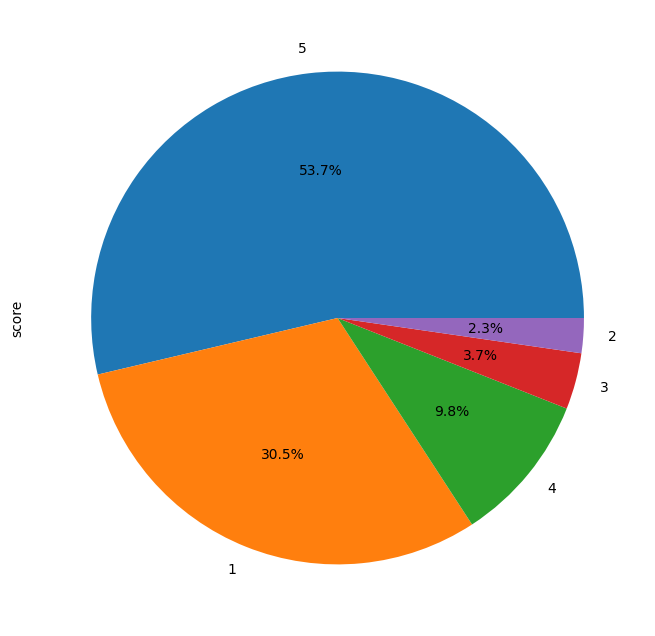

In [ ]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head()

,content,score
113501,Good,5
171366,Good,5
130189,Edcf,5
86398,Very good app,5
80163,it is greatful app,5


Install azure text analytics API

In [ ]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [ ]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [ ]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Streaming output truncated to the last 5000 lines.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Very bad experience Customer support response 0%only and I tried calling no response pls don't trust this type of app. Because I was adde rs4800 in mobiwik wallet amount debit from bank still not added in mobiwik Still not get any refund I am tired so many times customer care no response...
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Waste
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Superb App's
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Great apps
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Great Experience
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Amazing 🤩
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Great
Review Content Sentiment: positive
Review Content Score: 5
Review Con

In [ ]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    4281
negative    1855
neutral      520
mixed        206
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

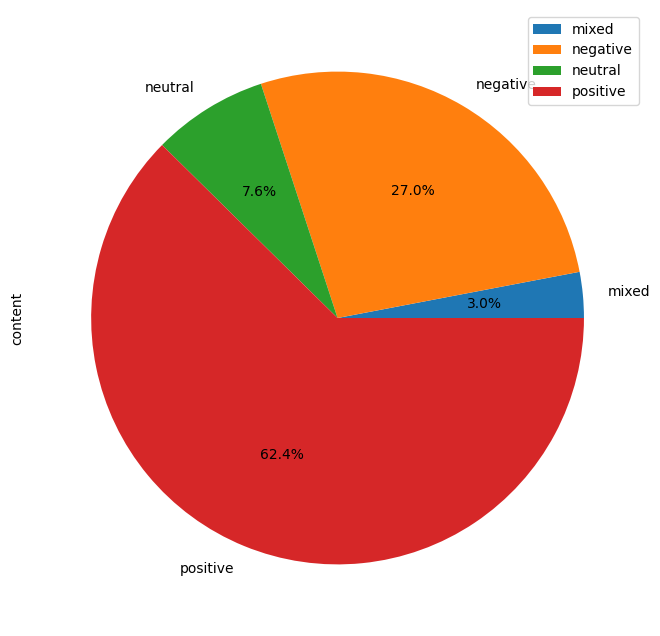

In [ ]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 151
           2                  11
           3                  10
           4                  11
           5                  23
negative   1                1591
           2                  86
           3                  54
           4                  39
           5                  85
neutral    1                 191
           2                  18
           3                  43
           4                  43
           5                 225
positive   1                 160
           2                  42
           3                 147
           4                 581
           5                3351
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

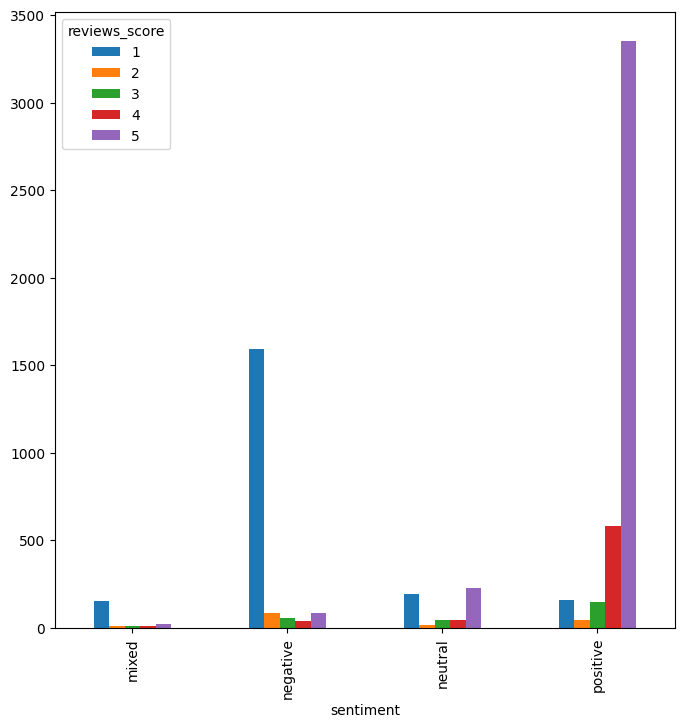

In [ ]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [ ]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        6862 non-null   object
 1   sentiment      6862 non-null   object
 2   reviews_score  6862 non-null   object
dtypes: object(3)
memory usage: 161.0+ KB


In [ ]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [ ]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [ ]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [ ]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        6862 non-null   object
 1   sentiment      6862 non-null   int64 
 2   reviews_score  6862 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 161.0+ KB


In [ ]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                 160
           2                  42
           3                 147
           4                 581
           5                3351
1          1                 191
           2                  18
           3                  43
           4                  43
           5                 225
2          1                1591
           2                  86
           3                  54
           4                  39
           5                  85
3          1                 151
           2                  11
           3                  10
           4                  11
           5                  23
Name: content, dtype: int64